In [3]:
%load_ext autoreload
%autoreload 1
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os, sys
from os.path import join as pjoin
sys.path.insert(0, pjoin(os.path.pardir, 'webapi'))
sys.path.insert(0, pjoin(os.path.pardir, os.path.pardir, 'mcdose'))
import numpy as np
import h5py
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES'] = ""
%aimport mcdose
from mcdose.visualize import vis_slice

In [59]:
# load testing data
testdata = np.load('/media/hdd1/g4sim/traindata/traindata_2020mar01_2k_14ctx_norm/test/test_000.npy')

In [60]:
print(testdata.shape)


(2106, 29, 101, 29, 3)


In [200]:
%aimport mcdose.visualize
from mcdose.visualize import vis_slice

def show(data, examplenum, slicenum, opacity=0.8):
    labels = data[..., 0]
    noisy = data[..., 1]
    geom = data[..., 2]

    fig = plt.figure(figsize=(10,10), dpi=100)
    axes = fig.subplots(1,4)
    dose_ims = []
    geom_ims = []

    l = labels[examplenum]
    lmin, lmax = np.amin(l), np.amax(l)
    l = (l-lmin)/lmax
    n = noisy[examplenum]
    n = (n-lmin)/lmax
    g = geom[examplenum]

    _, vims = vis_slice(g[slicenum], l[slicenum], thresh=8e-3, opacity=opacity, ax=axes[0])
    geom_ims.append(vims[0])
    dose_ims.append(vims[1])
    _, vims = vis_slice(g[slicenum], n[slicenum], thresh=0.006, opacity=opacity, ax=axes[1])
    geom_ims.append(vims[0])
    dose_ims.append(vims[1])
    im = axes[2].imshow(g[slicenum], cmap='gray')
    geom_ims.append(im)
    im = axes[3].imshow(l[slicenum])

    for ax in fig.axes:
        ax.set_xticks([])
        ax.set_yticks([])
    return fig

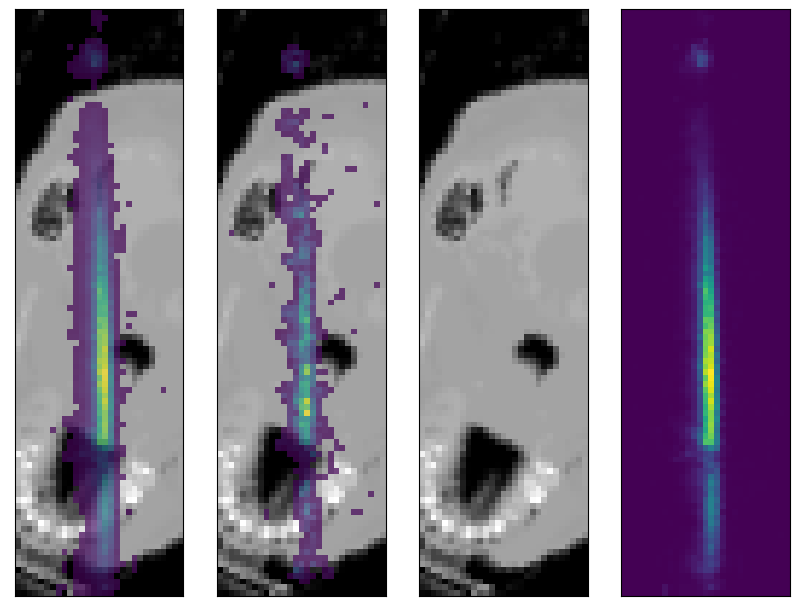

In [206]:
fig = show(testdata, 431, 15, opacity=0.7)
fig.savefig('example1.png')